In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
n = 200
X, y = make_moons(n_samples=n, noise=0.1, random_state=42)
y = 2*y-1
X = X - np.mean(X,axis=0)

d = 2   # Input dimension
m = 10  # Number of hidden units


np.random.seed(0)  # Ensure reproducibility
w1 = np.random.randn(2, m)
b1 = np.random.randn(m)
w2 = np.random.randn(m)
b2 = np.random.randn(1)
w1,b1,w2,b2

theta = {
    "w1": w1,
    "b1": b1,
    "w2": w2,
    "b2": b2
}


In [ ]:

def forward_pass(X,theta):
    w1, b1, w2, b2 = theta["w1"], theta["b1"], theta["w2"], theta["b2"]
    h = np.dot(X,w1) + b1
    z = np.dot(relu(h), w2)+b2
    return h,z


def compute_gradients(x, y, theta):
    w1, b1, w2, b2 = theta["w1"], theta["b1"], theta["w2"], theta["b2"]
    N = x.shape[0]

    h, z = forward_pass(x, theta)

    # loss_der =  2*(y-z)

    exp_term = np.exp(-y*z.flatten())
    loss_der = (-y*exp_term)/(1+exp_term) # loss derivative that we computed today


    dJdw2 = np.dot(loss_der,relu(h))/N
    dJdb2 = np.sum(loss_der)/N

    dJdw1 = np.dot((loss_der[:,np.newaxis]*X).T,(relu_derivative(h)*(w2)))/N
    # dJdw1 = -(2/N)*np.dot(x.T,(y-z)[:,np.newaxis]*(relu_derivative(h)*w2)).flatten()
    dJdb1 = np.sum((loss_der)[:,np.newaxis]*(relu_derivative(h)*w2),axis=0)/N

    gradients = {
        "w1": dJdw1,
        "b1": dJdb1,
        "w2": dJdw2,
        "b2": dJdb2
    }

    return gradients

In [ ]:

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return 1.0*(z > 0)


In [ ]:
#                   red                  or    blue
mycolormap = list(["#D81B60" if y[i] > 0 else "#1E88E5" for i in range(len(y)) ])
def plot_data_scatter(i = None, ax=None):
    if ax is None:
        ax = plt.gca()
    if i is None:
        plt.scatter(X[:, 0], X[:, 1], c=mycolormap, s=50)
    else:

        plt.scatter(X[i, 0], X[i, 1], c='k', s=300)
        plt.scatter(X[i, 0], X[i, 1], c=mycolormap[i], s=250)

def plot_decision_boundary(theta, ax=None):
    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    grid_points = np.c_[xx.ravel(), yy.ravel()]

    _, z = forward_pass(grid_points, theta)
    predictions = np.sign(z).reshape(xx.shape)

    ax.contourf(xx, yy, predictions, cmap='coolwarm', alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=mycolormap, edgecolor='k')

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)



def plot_normal_vector(w, ax=None):
    if ax is None:
        ax = plt.gca()
    v = w/np.sqrt(np.sum(w**2))

    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='#D81B60', linewidth=2)
    ax.quiver(0, 0, -v[0], -v[1], angles='xy', scale_units='xy', scale=1, color='#1E88E5', linewidth=2)


In [ ]:

theta_list = [theta]
step_size = 0.1
for i in range(10000):
    theta = theta_list[-1]
    theta_grad = compute_gradients(X,y,theta)
    theta['w1'] -= step_size*theta_grad['w1']
    theta['b1'] -= step_size*theta_grad['b1']
    theta['w2'] -= step_size*theta_grad['w2']
    theta['b2'] -= step_size*theta_grad['b2']
    theta_list.append(theta)

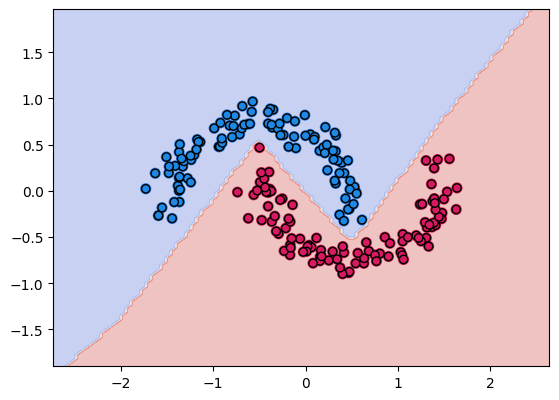

In [ ]:
plot_data_scatter()
plot_decision_boundary(theta)

plt.gca().set_aspect('equal')